# Feature Encoding

Feature Encoding ek process hai jisme "categorical data" (non-numeric values, e.g., city names, genders) ko "numeric format" me convert kiya jata hai, taake machine learning algorithms use kar sakein. Algorithms numerical inputs ko samajhte hain, isliye categorical data ko numerical form me represent karna zaruri hota hai.

## Why Feature Encoding is Important?

    Machine Learning Models Ko Compatible Banata Hai:

ML models numerical inputs ko samajhte hain, to categorical data encode karna zaruri hai.

    Improves Model Accuracy:

Encoded features se model zyada accurately patterns identify kar sakta hai.

    Handles Textual Data:

Text values (e.g., "Male", "Female") ko numerical values me represent karne ke liye encoding zaruri hai.

## Types of Feature Encoding
### 1. Label Encoding
### 2. One-Hot Encoding
### 3. Binary Encoding
### 4. Ordinal Encoding


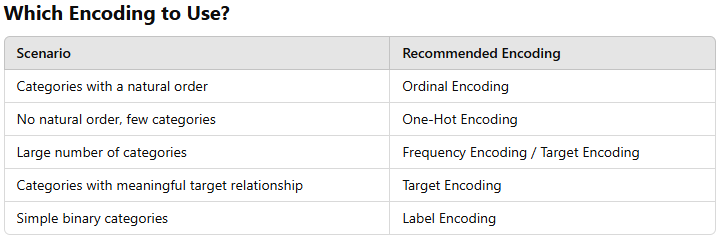

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [47]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [48]:
df['sex'].value_counts()



sex
Male      157
Female     87
Name: count, dtype: int64

In [49]:
df['smoker'].value_counts()


smoker
No     151
Yes     93
Name: count, dtype: int64

In [50]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [51]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [52]:
# for col in df.columns:
#     sns.histplot(df[col], kde=True)
#     plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder


### Label Encoder using sklearn

In [54]:
le = LabelEncoder()

df['modified_time'] = le.fit_transform( df[['time']])
df

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,total_bill,tip,sex,smoker,day,time,size,modified_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0


In [55]:
df['modified_time'].value_counts()

modified_time
0    176
1     68
Name: count, dtype: int64

## Ordinal Encoding using sklearn

In [56]:
oe = OrdinalEncoder(categories=[['Thur', 'Fri', 'Sat', 'Sun']])

df['modified_day'] = oe.fit_transform(df[['day']])
df

,total_bill,tip,sex,smoker,day,time,size,modified_time,modified_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,3.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,2.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,2.0


In [57]:
df['modified_day'].value_counts()

modified_day
2.0    87
3.0    76
0.0    62
1.0    19
Name: count, dtype: int64

## OneHot Encoding using sklearn

In [58]:
titanic = sns.load_dataset('titanic')


ohe = OneHotEncoder()

embraked_ohe = ohe.fit_transform(titanic[['embarked']])

## Binary Encoder using category_encoder

In [59]:
!pip install category_encoders

In [61]:
from category_encoders import TargetEncoder

 


ImportError: cannot import name 'Tags' from 'sklearn.utils' (c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\sklearn\utils\__init__.py)

## Encoding using panda

In [62]:
pd.get_dummies(df['day'])

,Thur,Fri,Sat,Sun
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
239,False,False,True,False
240,False,False,True,False
241,False,False,True,False
242,False,False,True,False


In [65]:
get_dumies = pd.get_dummies(df , columns= ['day'])
get_dumies

,total_bill,tip,sex,smoker,time,size,modified_time,modified_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,3.0,False,False,False,True
1,10.34,1.66,Male,No,Dinner,3,0,3.0,False,False,False,True
2,21.01,3.50,Male,No,Dinner,3,0,3.0,False,False,False,True
3,23.68,3.31,Male,No,Dinner,2,0,3.0,False,False,False,True
4,24.59,3.61,Female,No,Dinner,4,0,3.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,2.0,False,False,True,False
240,27.18,2.00,Female,Yes,Dinner,2,0,2.0,False,False,True,False
241,22.67,2.00,Male,Yes,Dinner,2,0,2.0,False,False,True,False
242,17.82,1.75,Male,No,Dinner,2,0,2.0,False,False,True,False
